### EDA use:
- Model building
- analysis and reporting
- validate assumptions
- handling missing values
- feature engineering
- detecting outliers

### Steps of EDA
1. Finding column type (Numeric, Category, Mixed)
-Featuring Eng. (if required)
2. Univariate Analysis (all columns)
    - Distribution analysis: shape, central tendency, outliers
        (Missing values, outliears, skeewness)
    - Visualizations
    - conclusion
-Featuring Eng. (if required)
3. Bivariate analysis (with Target Column)
-Featuring Eng. (if required)
    - Num-Num: linechart
    - Cat-Cat: crosstab
    - Cat-Num: barplot
4. Multivariate Analysis
    - Corelation
5. Conclusion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\TEMP.RYZENFIVE.008\OneDrive\Desktop\EDA Project\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.Embarked.nunique() #Categorical

3

In [5]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Columns Type

- **Categorical** : Survived, Pclass, Sex, SibSp, Parch, Embarked
- **Numerical** : Age, Fare
- **Mixed** : Name, Ticket, Cabin

# Univariate Analysis
## Numerical Columns
### Age
**conclusion**
- Almost normal distribution
- Almost No skewness, ligth rigth sknew (Positive=0.389)
- No Outliers
- 177 missing values (19% rows is empty)

In [7]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

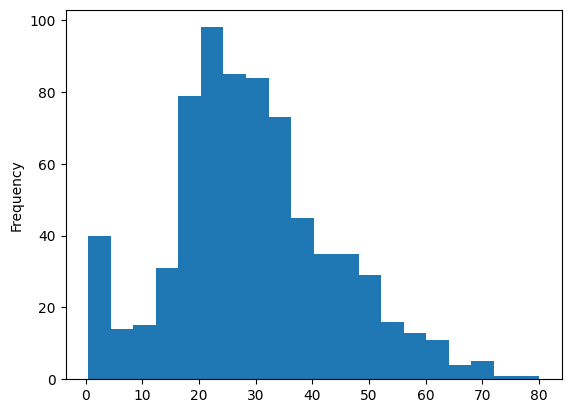

In [8]:
df['Age'].plot(kind='hist',bins=20);

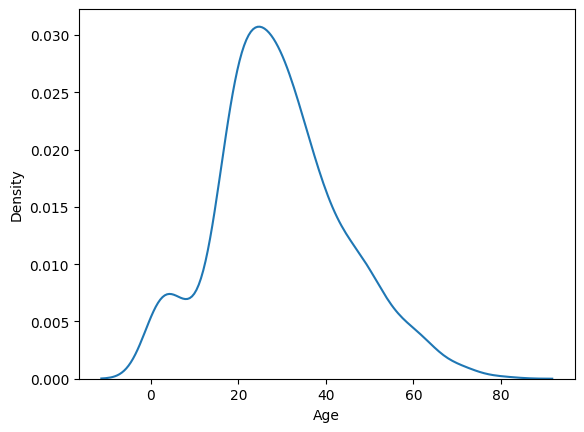

In [9]:
sns.kdeplot(df['Age']); # Almost normal distribution

In [10]:
print(df['Age'].skew()) # Almost No skewness, ligth rigth sknew (Positive=0.389)

0.38910778230082704


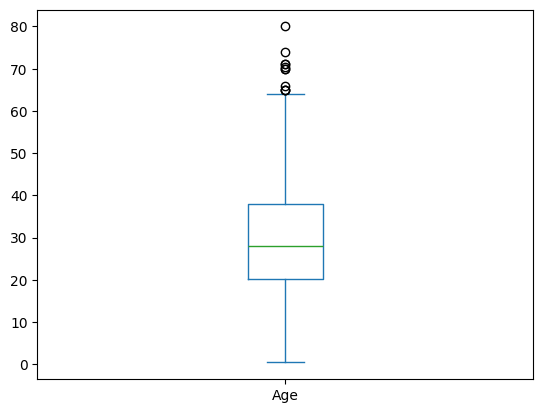

In [11]:
df['Age'].plot(kind='box'); # showing outliers, now checking this.

In [12]:
df[df.Age>65].sort_values(by='Age',ascending=True) # data is normal, No outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S


In [13]:
df.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [14]:
print(df.Age.isnull().sum()) # 177 missing values

177


In [15]:
print(df['Age'].isnull().sum()/len(df['Age'])*100) # 19% rows is empty

19.865319865319865


### Fare
**conclusion**
- No Missing value
- It is rigth & positive skewed (4.787)
- there are some miscellaneous values, It is fare for groups (Look like outliers)

In [16]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
df.Fare.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [18]:
print(df.Fare.isnull().sum()) # No Missing value

0


<Axes: ylabel='Frequency'>

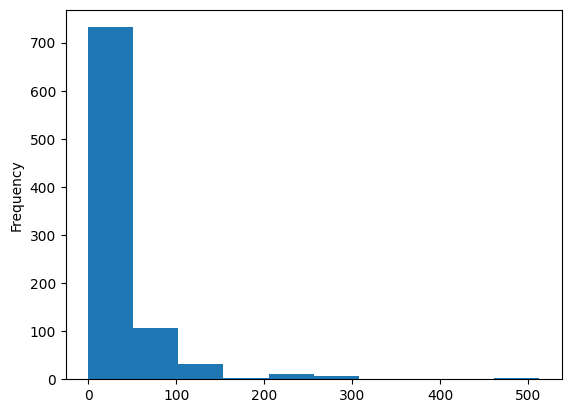

In [19]:
df.Fare.plot(kind='hist') #look like rigth skewed

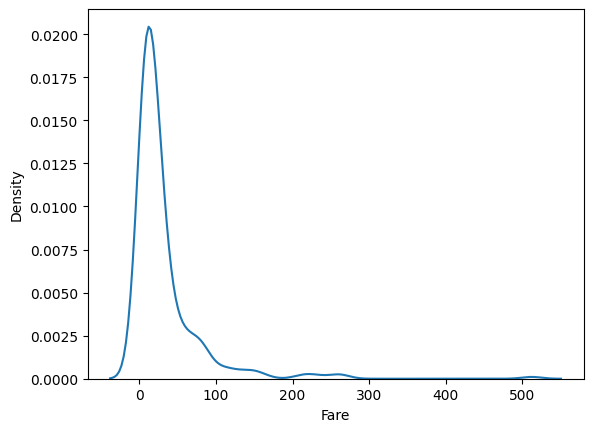

In [20]:
sns.kdeplot(df.Fare); # It is rigth skewed

In [21]:
print(df.Fare.skew()) # It is positive skewed (4.787)

4.787316519674893


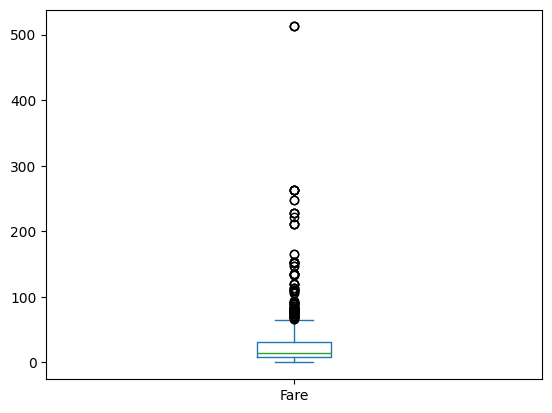

In [22]:
df.Fare.plot(kind='box'); 

In [23]:
df[df.Fare>250].sort_values(by='Fare',ascending=True) # there are some miscellaneous values, It is fare for groups

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


## Categorical
### Survived
**Conclusion**
- No missing data
- **Unsurvived (0)** = 549 *(61.62%)* , **Survived (1)** = 342 *(38.38%)*

In [24]:
df.Survived.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [25]:
print(df.Survived.isnull().sum()) # No missing values

0


In [26]:
df.Survived.nunique() #2 unique value

2

In [27]:
df.Survived.value_counts() #0 is Unsurvived (549) while 1 is Survived (342)

Survived
0    549
1    342
Name: count, dtype: int64

In [28]:
df.Survived.value_counts()/len(df.Survived)*100 #0 is Unsurvived = 549(62%) while 1 is Survived = 342(38%)

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

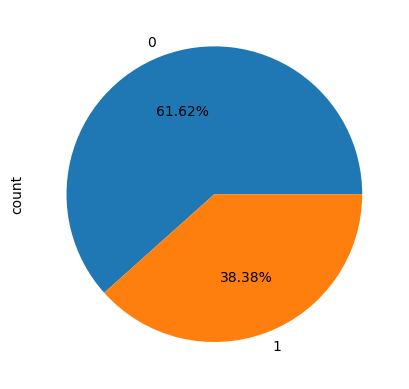

In [29]:
df.Survived.value_counts().plot(kind='pie',autopct='%0.2f%%');

### Pclass
**conclusion**
- No missing data
- 3 category in Passenger Class
    - **1** = 216 *(24.24%)*
    - **2** = 184 *(20.65%)*
    - **3** = 491 *(55.11%)* 

In [30]:
df.Pclass.info() #no missing data

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Pclass
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [31]:
df.Pclass.nunique() # 3 category

3

In [32]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [33]:
df.Pclass.value_counts(normalize=True)*100

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

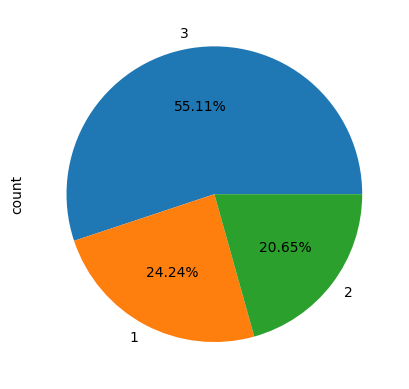

In [34]:
df.Pclass.value_counts().plot(kind='pie',autopct='%0.2f%%');

### Sex
**conclusion**
- No missing data
    - **Male** = 577 *(64.76%)*
    - **Female** = 314 *(35.24%)*

In [35]:
df.Sex.info() #no missing data

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [36]:
df.Sex.nunique()

2

In [37]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [38]:
df.Sex.value_counts(normalize=True)*100

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

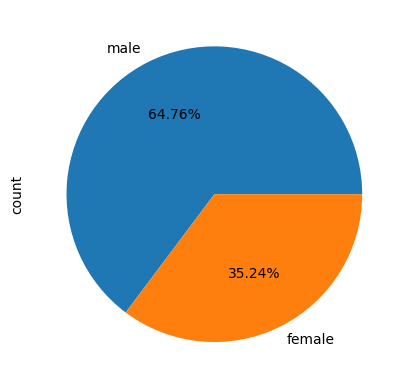

In [39]:
df.Sex.value_counts().plot(kind='pie',autopct='%0.2f%%');

### SibSp (Siblings)
**conclusion**
- No missing data
- 7 category [0,1,2,3,4,5,8]
- Majority is 0 siblings which is 608 *(68.24%)*
- Then 1 siblings which is 209 *(23.46%)*
- And 5 & 8 siblings (Bottom 2) which is 5 & 7 

In [40]:
df.SibSp.info() # No missing data

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: SibSp
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [41]:
df.SibSp.nunique()

7

In [42]:
df.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [43]:
df.SibSp.value_counts(normalize=True)*100

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: proportion, dtype: float64

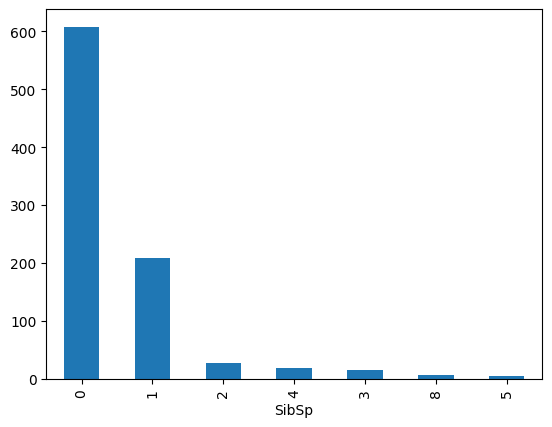

In [44]:
df.SibSp.value_counts().plot(kind='bar');

### Parch (Parent-Child)
**conclusion**
- No missing Data
- 7 unique values (0,1,2,3,4,5,6)
- Majority passengers have 0 Parent-child which is 678 *(76.09%)*
- Then 1 Parent-Child which is 118 *(13.24%)*
- 6 Parent-Child which is only 1

In [45]:
df.Parch.info() #no missing data

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Parch
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [46]:
df.Parch.nunique()

7

In [47]:
df.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [48]:
df.Parch.value_counts(normalize=True)*100

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: proportion, dtype: float64

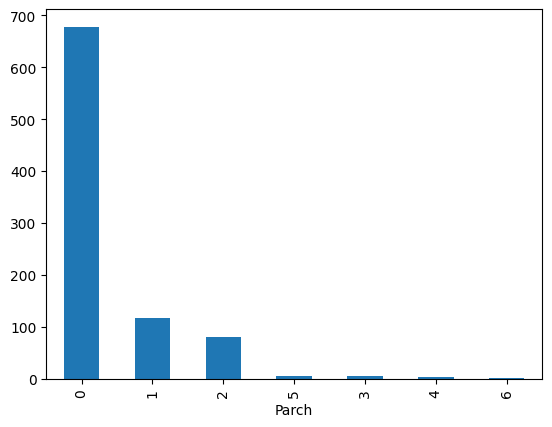

In [49]:
df.Parch.value_counts().plot(kind='bar');

### Embarked (Platform)
**conclusion**
- 2 missing values
- 3 category 
    - **S**= 644 *(72.44%)*
    - **C**= 168 *(18.90%)*
    - **Q**= 77 *(8.66%)*
- Majority of Passengers choose **S**

In [50]:
df.Embarked.info() #there is some missing data

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [51]:
print(df.Embarked.isnull().sum()) #2 value are missing

2


In [52]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [53]:
df.Embarked.value_counts(normalize=True)*100

Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64

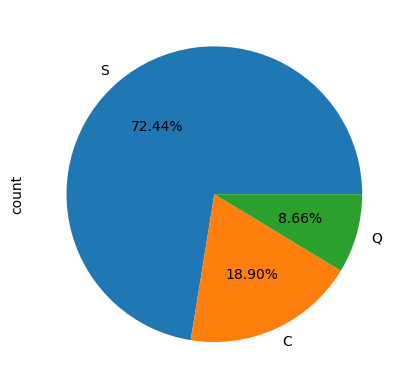

In [54]:
df.Embarked.value_counts().plot(kind='pie',autopct='%0.2f%%');

### Feature Engineering
- *adding new columns with recpect to Fare and Family_size*
- *And merging rest of data for more information and accuracy*

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dft=pd.read_csv(r"C:\Users\TEMP.RYZENFIVE.008\OneDrive\Desktop\EDA Project\test.csv")
dft

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df=pd.concat([df,dft])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
df['Individual_Fare']=df.Fare/(df.SibSp+df.Parch+1)

In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,8.45830
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,51.86250
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4.21500
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3.71110
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,15.03540


In [8]:
df['Family_size']=df.SibSp+df.Parch+1
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fare,Family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,8.45830,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,51.86250,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4.21500,5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3.71110,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,15.03540,2


In [8]:
df.Family_size.value_counts()

Family_size
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64

# Bivariate Analysis

In [64]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Individual_Fare',
       'Family_size'],
      dtype='object')

## Category to Category
### Survived & Family_size
**conclusion**
- Large Family [more than 5] has less chance to survive only 16% chance for survive
- Alone passengers have also less chance to survive only 30% chance for survive
- Small Family [range of 2 to 4] has 60-40 chance to survive and unsurvive, we can said that more than 50% chance to survive

In [96]:
pd.crosstab(df.Survived,df.Family_size,normalize='columns')*100

Family_size,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0.0,69.646182,44.720497,42.156863,27.586207,80.0,86.363636,66.666667,100.0,100.0
1.0,30.353818,55.279503,57.843137,72.413793,20.0,13.636364,33.333333,0.0,0.0


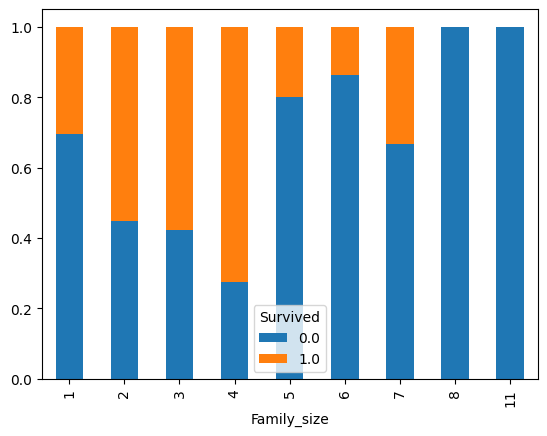

In [70]:
pd.crosstab(df.Family_size,df.Survived,normalize='index').plot(kind='bar',stacked=True);

### Feature Engineering
*adding new columns on the bases of family_size*

In [9]:
def transform_family_size(num): # family_type
    if num == 1:
        return 'alone' # Family= 1 -> alone
    elif num>1 and num <5:
        return "small" # Family = [2-4] -> small
    else:
        return "large" # family > 5 -> large

In [10]:
df['Family_type'] = df['Family_size'].apply(transform_family_size)

In [11]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fare,Family_size,Family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,8.45830,1,alone
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,51.86250,1,alone
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4.21500,5,large
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3.71110,3,small
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,15.03540,2,small


In [12]:
pd.crosstab(df['Survived'],df['Family_type'],normalize='columns')*100

Family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


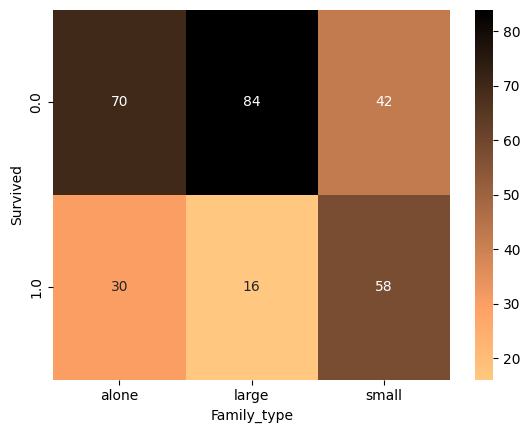

In [13]:
sns.heatmap((pd.crosstab(df['Survived'],df['Family_type'],normalize='columns')*100),annot=True, cmap='copper_r');

### Survived & Sex
**conclusion**
- Females have more chance to survive than Males
- Females have 15% chance to unsurvive while Males have 85% which is big difference

In [88]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Individual_Fare',
       'Family_size', 'Family_type'],
      dtype='object')

In [101]:
pd.crosstab(df.Survived,df.Sex,normalize='index')*100

Sex,female,male
Survived,,
0.0,14.754098,85.245902
1.0,68.128655,31.871345


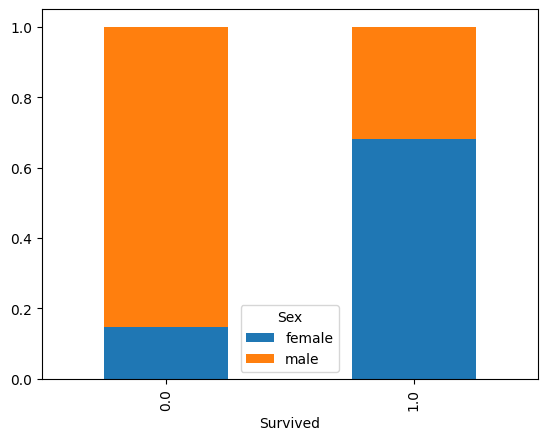

In [93]:
pd.crosstab(df.Survived,df.Sex,normalize='index').plot(kind='bar',stacked=True);

In [102]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Individual_Fare',
       'Family_size', 'Family_type'],
      dtype='object')

### Survived & Embarked
**conclusion**
- Majority of Passengers (70%) use S Embarked and 34% passengers are survived
- Passengers who use C Embarked have more than 50% passengers are survived
- Minimal passengers (9%) used Q Embarked, and 39% passengers are survived

In [128]:
pd.crosstab(df.Survived, df.Embarked)

Embarked,C,Q,S
Survived,,,
0.0,75,47,427
1.0,93,30,217


In [126]:
pd.crosstab(df.Embarked,df.Survived, normalize='index')*100

Survived,0.0,1.0
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


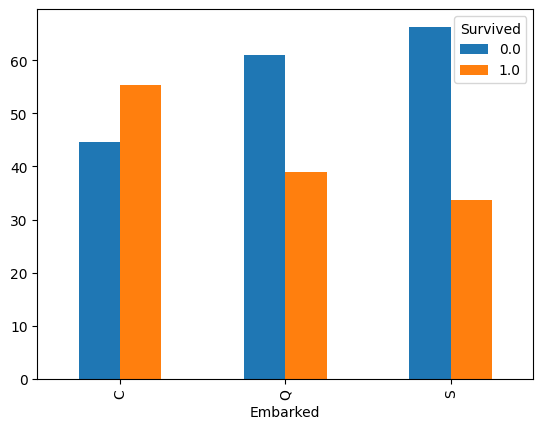

In [18]:
(pd.crosstab(df.Embarked,df.Survived, normalize='index')*100).plot(kind='bar');

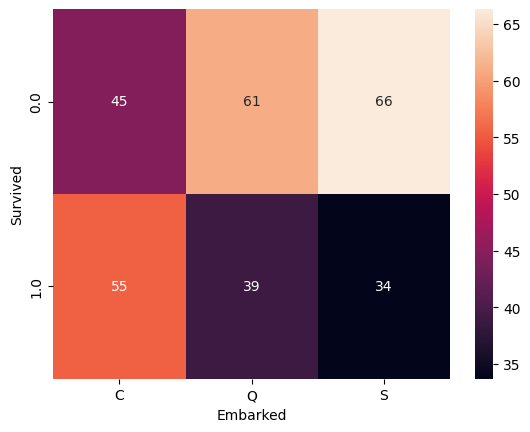

In [115]:
sns.heatmap((pd.crosstab(df.Survived, df.Embarked, normalize='columns')*100),annot=True);

In [117]:
df.Embarked.value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [134]:
df.Embarked.value_counts(normalize=True)*100

Embarked
S    69.931140
C    20.657995
Q     9.410865
Name: proportion, dtype: float64

### Survived & Pclass
**conclusion**
- 3rd Class Passengers have less chance to survive than other class
- 2nd Class has 50-50 chance
- 1st Class has more chance to survive than other passenger class

In [135]:
pd.crosstab(df.Pclass, df.Survived, normalize='columns')*100

Survived,0.0,1.0
Pclass,,
1,14.571949,39.766082
2,17.668488,25.438596
3,67.759563,34.795322


In [14]:
pd.crosstab(df.Pclass, df.Survived, normalize='index')*100

Survived,0.0,1.0
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


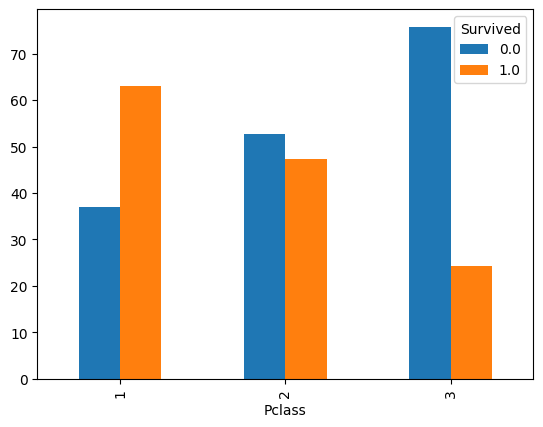

In [22]:
(pd.crosstab(df.Pclass, df.Survived, normalize='index')*100).plot(kind='bar');

**Categorical Conclusion**
- Passengers who are traveling in 1st class have more chance to survive and if they are females then it is plus point
- With choosing C Embarked passengers, it gives additional chance to survive
- Those passengers are alone who have only 30% chance to survive
- Group of 4 or less than 4 have more than 50% chance to survive otherwise 80% chance to unsurvive

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Individual_Fare',
       'Family_size', 'Family_type'],
      dtype='object')

## Category to Numerical
### Survived & Age
**conclusion**
- Passengers whose age in range of 20 to 40 have more chance to survive
- otherwise less chance to survive
- Marjority of Passengers are Youngsters (age range 20 to 40)
- Passengers whose age is near by 39 choose 1st Pclass.

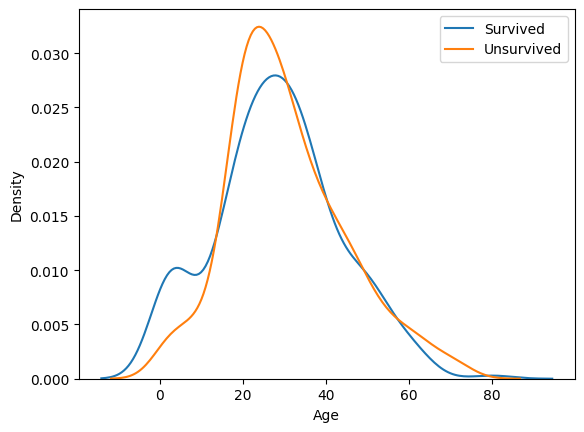

In [26]:
sns.kdeplot(df[df['Survived'] == 1]['Age'],label='Survived')
sns.kdeplot(df[df['Survived'] == 0]['Age'],label='Unsurvived')
plt.legend();

In [30]:
print(df[df.Pclass==1].Age.mean())

39.15992957746479


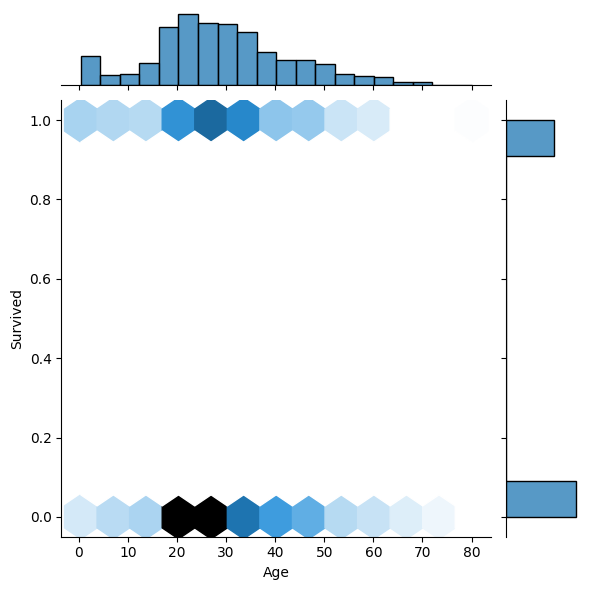

In [48]:
sns.jointplot(data=df,x='Age',y='Survived',kind='hex');

### Survived & Individual_Fare

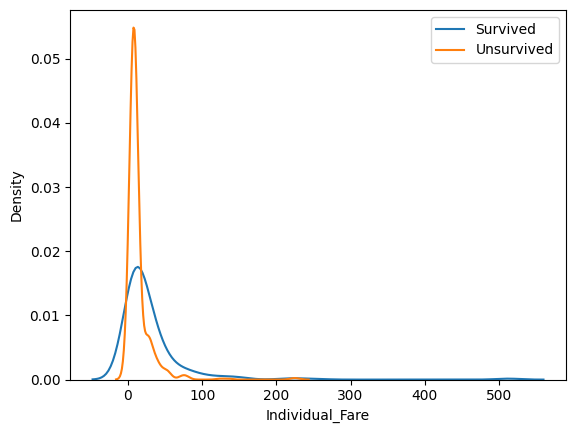

In [49]:
sns.kdeplot(df[df['Survived'] == 1]['Individual_Fare'],label='Survived')
sns.kdeplot(df[df['Survived'] == 0]['Individual_Fare'],label='Unsurvived')
plt.legend();

# Conclusion
- Passengers who are traveling in 1st class have more chance to survive and if they are females then it is plus point
- Passengers whose age is near by 39 choose 1st Pclass.
- Passengers whose age in range of 20 to 40 have more chance to survive
- Marjority of Passengers are Youngsters (age range 20 to 40)
- With choosing C Embarked passengers, it gives additional chance to survive
- Those passengers are alone who have only 30% chance to survive
- Group of 4 or less than 4 have more than 50% chance to survive otherwise 80% chance to unsurvive